## Cargar el dataset

In [2]:
import pandas as pd
df = pd.read_csv("csv/rl3.csv")
df.head()

,x,y
0,24,82945
1,35,257251
2,36,279937
3,36,279937
4,42,444529


## Preparamiento de los datos

In [3]:
# Añadir columna x^2
df['x3'] = df['x']**3

# Separar las columnas x y x^2
X = df[['x3']]
y = df['y']

# Quitamos la columna x
df = df.drop('x', axis=1)

df.head()

,y,x3
0,82945,13824
1,257251,42875
2,279937,46656
3,279937,46656
4,444529,74088


## Visualización de los datos

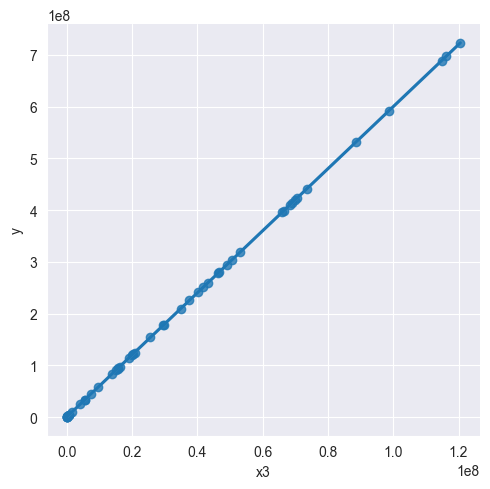

In [4]:
import seaborn as sns

sns.lmplot(data=df, x='x3', y='y', order=1)

## Preparación del conjunto de datos

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

## Creación del modelo

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print(f"Coeficiente: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

Coeficiente: [6.]
Intercepto: 1.0000000298023224


## Predicción

In [7]:
y_pred = model.predict(X_test)

from sklearn import metrics

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"R2: {metrics.r2_score(y_test, y_pred)}")
print(f"var: {metrics.explained_variance_score(y_test, y_pred)}")

MSE: 1.5112556923440345e-15
R2: 1.0
var: 1.0


## Visualización de la predicción

In [8]:
print(f"La recta de regresión es: y = {round(model.coef_[0], 2)}x^3 + {round(model.intercept_, 2)}")

La recta de regresión es: y = 6.0x^3 + 1.0
